## A Quick ETL (Extract - Tranform - Load) Process to Showcase Python's Pandas library
### Source Data: Zillow's Median Home Value with Time Series
### ETL process:
#### 1- clean up data, remove unused columns, rename columns
#### 2 - filter out data to obtain only Austin-RoundRock metro area
#### 3 - calculate YoY value change in percentage format
#### 4 - calculate median home value each year
#### 5 - export data to csv for loading into database or analytical process
#### 6 - bonus: we can build visualization here in Python to quickly see trends and projections

In [3]:
# input dependencies
import pandas as pd
import numpy as np

In [4]:
# original Zillow data set
inputFile = "data-source/Zip_Zhvi_AllHomes.csv"

csv_reader = pd.read_csv(inputFile, encoding='latin-1')

df = pd.DataFrame(csv_reader)
df.rename(index=str, columns={'RegionName' : 'Zip'}, inplace = True)
df.head()

,RegionID,Zip,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2018-2019 Diff
0,61639,10025,New York,NY,New York-Newark-Jersey City,New York County,1,171600.0,171600.0,171400.0,...,1114700,1109100,1097800,1086100,1079400,1071200,1064300,1048600,1027300,NaN
1,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,158400.0,159700.0,160700.0,...,349900,348000,346800,347100,348400,350300,352200,352500,352300,NaN
2,61637,10023,New York,NY,New York-Newark-Jersey City,New York County,3,347900.0,349600.0,351100.0,...,1500400,1487900,1462200,1437800,1411100,1390200,1379300,1369500,1363000,NaN
3,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,210400.0,212200.0,212200.0,...,334500,335900,337100,338300,338400,336900,336000,335900,335200,NaN
4,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,5,192500.0,194500.0,196100.0,...,427800,427800,429400,430500,429600,429600,431000,431500,431800,NaN


In [5]:
# clean up unused columns
df.drop(columns=['RegionID'], inplace = True)

In [6]:
df = df.loc[df['Metro'] == 'Austin-Round Rock']
df.head()

,Zip,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2018-2019 Diff
15,78660,Pflugerville,TX,Austin-Round Rock,Travis County,16,138800.0,138400.0,138300.0,138300.0,...,243900,244800,245700,246300,246600,247300,248300,249200,249600,0.2%
32,78613,Cedar Park,TX,Austin-Round Rock,Williamson County,33,168700.0,168200.0,167700.0,167500.0,...,294000,294100,293700,293500,294200,295800,298000,300700,302600,0.6%
62,78704,Austin,TX,Austin-Round Rock,Travis County,63,213100.0,212900.0,212800.0,212700.0,...,508600,512900,517100,521100,523500,526300,532800,539300,541500,0.4%
79,78666,San Marcos,TX,Austin-Round Rock,Hays County,80,100700.0,100500.0,100300.0,100200.0,...,205100,206300,207200,207300,207200,207200,207300,207700,208400,0.3%
83,78745,Austin,TX,Austin-Round Rock,Travis County,84,135300.0,134500.0,134000.0,133900.0,...,297000,298800,300400,302300,304700,307700,311200,314700,316900,0.7%


In [7]:
def avgHomeValue (list):
    return round(sum(list)/len(list),2)

df1 = pd.DataFrame()

df1['Zip'] = df['Zip']
df1['City'] = df['City']
df1['County'] = df['CountyName']

# calculate yearly average of home value
monthList = []
for i in range (1997, 2019):
    for j in range (1,13):
        if j<10:
            monthList.append(df[str(i) + '-0' + str(j)])
        else:
            monthList.append(df[str(i) + '-' + str(j)])
        j += 1
    df1[str(i)] = avgHomeValue(monthList)

# reset index
df1 = df1.reset_index(drop=True)
df1.head()

,Zip,City,County,1997,1998,1999,2000,2001,2002,2003,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,78660,Pflugerville,Travis County,141350.00,139450.00,140566.67,142641.67,144238.33,145859.72,146739.29,...,155595.51,156675.60,157378.89,157928.65,158752.94,160013.89,161915.79,164554.58,167819.05,171329.92
1,78613,Cedar Park,Williamson County,177400.00,190275.00,191413.89,191252.08,191751.67,191351.39,190208.33,...,192182.69,192698.81,192908.33,193429.69,194310.78,196270.37,199062.28,202527.50,206590.08,210606.06
2,78704,Austin,Travis County,231766.67,238454.17,235755.56,246779.17,257228.33,262805.56,264284.52,...,290692.31,292794.05,294645.56,296928.65,301327.45,307261.11,314887.72,322679.17,330286.90,338649.62
3,78666,San Marcos,Hays County,103608.33,104229.17,106019.44,107870.83,109670.00,111070.83,112346.43,...,123541.03,124656.55,125472.78,126218.23,127045.59,128168.98,129914.04,132295.42,135079.37,138239.02
4,78745,Austin,Travis County,134375.00,135033.33,134027.78,135904.17,138215.00,139668.06,140441.67,...,149773.72,151635.12,152910.56,154148.44,156022.55,158441.20,161986.84,166688.75,172253.17,178095.08


In [8]:
# function calculating year over year value change in percentage, level of detail to 1 digit after dicimal point
def pctChange (x, y):
    return round((x-y)/y*100, 1)

df2 = pd.DataFrame()

df2['Zip'] = df['Zip']
df2['City'] = df['City']
df2['County'] = df['CountyName']

# calculating each year's percentage of change
for i in range(1996, 2018):
    j = i+1
    currentMon = str(j) + '-12'
    lastMon = str(i) + '-12' 
    df2[str(j)] = pctChange(df[currentMon], df[lastMon])
    i += 1

# reset index
df2 = df2.reset_index(drop=True)
df2.head()

,Zip,City,County,1997,1998,1999,2000,2001,2002,2003,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,78660,Pflugerville,Travis County,0.6,-2.6,8.1,1.1,2.2,0.6,-0.8,...,-2.0,0.6,-3.4,2.3,4.1,6.6,9.0,9.7,6.8,4.4
1,78613,Cedar Park,Williamson County,12.6,8.0,-7.0,1.1,-1.0,0.1,-10.5,...,-1.3,-1.9,-0.8,5.3,3.4,14.2,4.6,10.4,4.3,2.8
2,78704,Austin,Travis County,16.5,-7.3,7.5,19.2,1.4,-6.7,-4.9,...,-3.8,0.7,-0.3,10.3,9.5,11.4,8.5,1.1,2.8,11.3
3,78666,San Marcos,Hays County,3.5,1.6,5.0,3.5,1.7,1.8,0.9,...,-2.1,2.1,-4.9,5.8,-0.4,10.3,8.6,11.5,3.6,7.0
4,78745,Austin,Travis County,-3.7,3.6,-0.4,6.3,4.0,-3.6,0.5,...,-0.3,2.7,-3.8,3.6,10.6,5.6,17.5,11.7,7.3,8.8


In [9]:
# export result to output csv file
output1 = 'zillow-median-home-value-YoY.csv'
output2 = 'zillow-yoy-price-change-Percent.csv'
df1.to_csv(output1, index=True)
df2.to_csv(output2, index=True)

In [10]:
# still a working progress, further data transformation is needed.

import matplotlib.pyplot as plt

df2 = df1.T

df2.reset_index()

xlim = df2.iloc[:,1]
xlim = list(xlim)
xlim = xlim[3:]
xlim

[177400.0,
 190275.0,
 191413.89,
 191252.08,
 191751.67,
 191351.39,
 190208.33,
 188685.42,
 188253.7,
 188871.67,
 190175.76,
 191388.89,
 192182.69,
 192698.81,
 192908.33,
 193429.69,
 194310.78,
 196270.37,
 199062.28,
 202527.5,
 206590.08,
 210606.06]

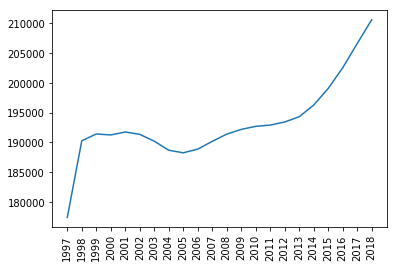

In [11]:
ylim = df2.index.values
ylim = list(ylim[3:])
ylim

plt.plot(ylim, xlim)
plt.xticks(rotation='vertical')
plt.show()

In [12]:
!jupyter nbconvert --to Python Zillow-Data-ETL.ipynb

[NbConvertApp] Converting notebook Zillow-Data-ETL.ipynb to Python
[NbConvertApp] Writing 2871 bytes to Zillow-Data-ETL.py
